In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## Make blobs in X

In [21]:
X = np.loadtxt('https://gist.githubusercontent.com/cbrownley/c2db82b80b00e38ef3b1987b64f03d95/raw/cf1c7e393a092953ea482824872426402b63d73a/some_blobs.csv', delimiter=',').reshape(300, 2)
X[:5]

array([[-1.47804153,  3.2093591 ],
       [ 5.9766406 ,  1.44923279],
       [10.1396158 , -1.98891907],
       [ 9.93282365, -2.77237903],
       [ 1.83769075,  1.82229552]])

In [22]:
X.shape

(300, 2)

## Step 1: [Use the elbow method to find the optimal number of clusters](https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_11.xhtml#_idParaDest-212)

Copy and paste the code block for the course textbook illustrating [using the elbow method to find the optimal number of clusters](https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_11.xhtml#_idParaDest-212) to identify the optimal number of clusters contained in the data `X`.

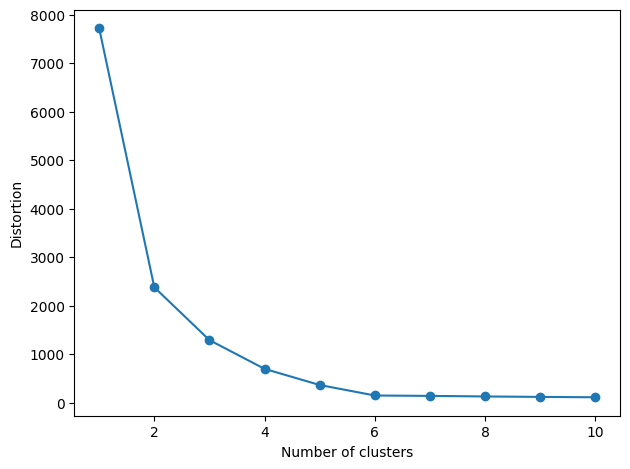

In [23]:
# SOURCE: https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_11.xhtml#_idParaDest-212
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show();

## Step 2: [Fit KMeans using the optimal number of clusters](https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_11.xhtml#_idParaDest-209)

In the `KMeans()` constructor, set `n_clusters=` the optimal number of clusters you identified in Step 1 (as an integer), set `init='k-means++'`, and also set the other parameters used in the source link.

In [24]:
# SOURCE: https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_11.xhtml#_idParaDest-209
km = KMeans(n_clusters=6,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)

y_km = km.fit_predict(X)
y_km

array([5, 4, 1, 1, 2, 5, 1, 3, 5, 1, 4, 4, 3, 0, 5, 3, 3, 4, 2, 0, 4, 0,
       3, 1, 0, 3, 5, 2, 0, 0, 5, 4, 3, 4, 2, 1, 2, 1, 0, 2, 3, 0, 3, 2,
       4, 4, 4, 5, 5, 5, 1, 0, 5, 0, 4, 5, 0, 5, 4, 0, 4, 2, 2, 0, 1, 4,
       1, 4, 0, 5, 5, 0, 2, 0, 4, 1, 2, 1, 0, 3, 4, 1, 5, 3, 4, 4, 0, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 3, 1, 4, 3, 5, 5, 2, 0, 5, 3,
       0, 2, 2, 0, 3, 0, 1, 2, 2, 2, 3, 1, 0, 2, 2, 1, 5, 0, 0, 5, 5, 5,
       5, 0, 5, 1, 1, 1, 0, 5, 2, 4, 1, 0, 4, 3, 4, 4, 1, 3, 1, 3, 0, 1,
       3, 4, 1, 0, 3, 4, 3, 5, 1, 4, 1, 5, 3, 1, 3, 3, 5, 2, 0, 1, 3, 2,
       2, 3, 4, 5, 3, 1, 0, 5, 5, 3, 0, 2, 3, 0, 1, 2, 3, 3, 3, 5, 4, 0,
       3, 4, 3, 2, 0, 0, 1, 2, 0, 3, 2, 1, 5, 1, 3, 4, 0, 1, 2, 4, 2, 0,
       3, 3, 1, 0, 0, 5, 5, 3, 4, 5, 2, 0, 5, 0, 3, 1, 1, 2, 3, 4, 3, 5,
       0, 3, 1, 5, 1, 4, 1, 2, 3, 5, 4, 4, 1, 4, 0, 2, 5, 2, 0, 1, 2, 5,
       4, 3, 3, 1, 2, 1, 1, 3, 1, 2, 5, 5, 0, 0, 3, 2, 2, 2, 2, 4, 1, 5,
       2, 3, 5, 5, 5, 1, 0, 4, 2, 5, 5, 4, 4, 1], d

## Step 3: [Plot the clusters and centroids](https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_11.xhtml#_idParaDest-209)

In the `range()` function, enter the optimal number of clusters you identified in Step 1 (as an integer) to plot the points for each cluster.

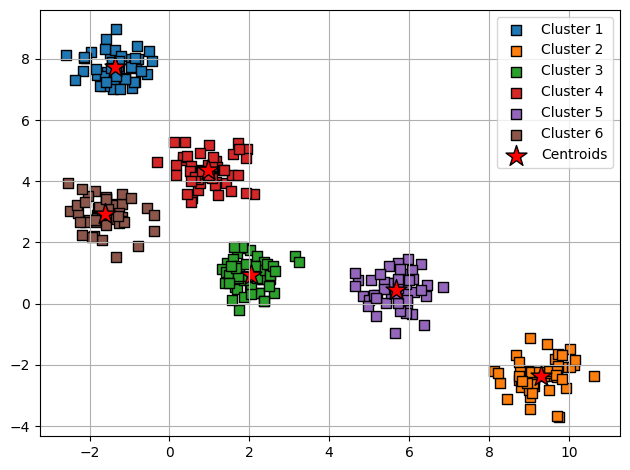

In [25]:
# SOURCE: https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_11.xhtml#_idParaDest-209
for i in range(6):
    plt.scatter(X[y_km == i, 0],
                X[y_km == i, 1],
                s=50,
                marker='s', edgecolor='black',
                label=f'Cluster {i+1}')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show();